In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
from tslearn.metrics import dtw 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 

In [2]:
import json
import pickle
import numpy as np

def pickle_dump(obj, path):
    with open(path, mode='wb') as f:
        pickle.dump(obj,f)

def pickle_load(path):
    with open(path, mode='rb') as f:
        data = pickle.load(f)
        return data 

def mean_pre_nex(data, pre=5, nex=5):
    m_data = np.array(data)
    ave_data = []
    for i in np.arange(len(m_data)):
        p_pre = i-pre if i-pre>=0 else 0
        p_nex = i+nex if i+nex<len(m_data) else len(m_data)-1
        ave_data += [np.mean(m_data[p_pre:p_nex])]
    return ave_data  

def load_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

def load_json_lines(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            json_object = json.loads(line)
            data.append(json_object)
    return data


dict_keys(['nupdates', 'total_timesteps', 'fps', 'explained_variance 0', 'policy_entropy 0', 'policy_loss 0', 'value_loss 0', 'pearson 0', 'spearman 0', 'reward 0', 'explained_variance 1', 'policy_entropy 1', 'policy_loss 1', 'value_loss 1', 'pearson 1', 'spearman 1', 'reward 1', 'explained_variance 2', 'policy_entropy 2', 'policy_loss 2', 'value_loss 2', 'pearson 2', 'spearman 2', 'reward 2', 'explained_variance 3', 'policy_entropy 3', 'policy_loss 3', 'value_loss 3', 'pearson 3', 'spearman 3', 'reward 3', 'total_loss 0', 'total_loss 1', 'total_loss 2', 'total_loss 3'])


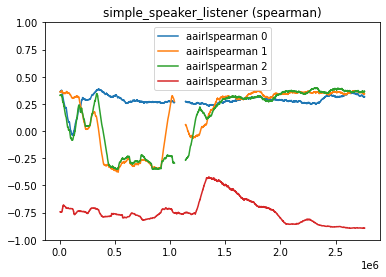

dict_keys(['nupdates', 'total_timesteps', 'fps', 'explained_variance 0', 'policy_entropy 0', 'policy_loss 0', 'value_loss 0', 'pearson 0', 'spearman 0', 'reward 0', 'explained_variance 1', 'policy_entropy 1', 'policy_loss 1', 'value_loss 1', 'pearson 1', 'spearman 1', 'reward 1', 'explained_variance 2', 'policy_entropy 2', 'policy_loss 2', 'value_loss 2', 'pearson 2', 'spearman 2', 'reward 2', 'explained_variance 3', 'policy_entropy 3', 'policy_loss 3', 'value_loss 3', 'pearson 3', 'spearman 3', 'reward 3', 'total_loss 0', 'total_loss 1', 'total_loss 2', 'total_loss 3'])


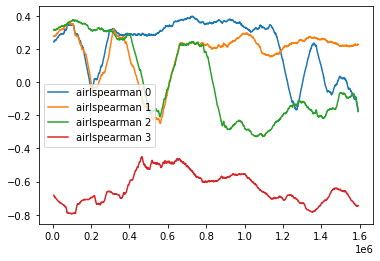

dict_keys(['nupdates', 'total_timesteps', 'fps', 'explained_variance 0', 'policy_entropy 0', 'policy_loss 0', 'value_loss 0', 'archive_num 0', 'pearson 0', 'spearman 0', 'reward 0', 'explained_variance 1', 'policy_entropy 1', 'policy_loss 1', 'value_loss 1', 'archive_num 1', 'pearson 1', 'spearman 1', 'reward 1', 'explained_variance 2', 'policy_entropy 2', 'policy_loss 2', 'value_loss 2', 'archive_num 2', 'pearson 2', 'spearman 2', 'reward 2', 'explained_variance 3', 'policy_entropy 3', 'policy_loss 3', 'value_loss 3', 'archive_num 3', 'pearson 3', 'spearman 3', 'reward 3', 'total_loss 0', 'total_loss 1', 'total_loss 2', 'total_loss 3'])


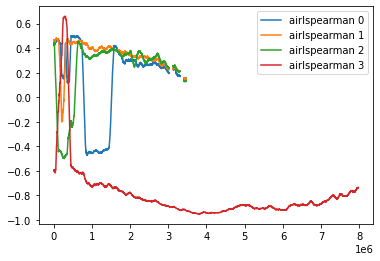

dict_keys(['nupdates', 'total_timesteps', 'fps', 'explained_variance 0', 'policy_entropy 0', 'policy_loss 0', 'value_loss 0', 'pearson 0', 'spearman 0', 'reward 0', 'explained_variance 1', 'policy_entropy 1', 'policy_loss 1', 'value_loss 1', 'pearson 1', 'spearman 1', 'reward 1', 'explained_variance 2', 'policy_entropy 2', 'policy_loss 2', 'value_loss 2', 'pearson 2', 'spearman 2', 'reward 2', 'explained_variance 3', 'policy_entropy 3', 'policy_loss 3', 'value_loss 3', 'pearson 3', 'spearman 3', 'reward 3', 'total_loss 0', 'total_loss 1', 'total_loss 2', 'total_loss 3'])


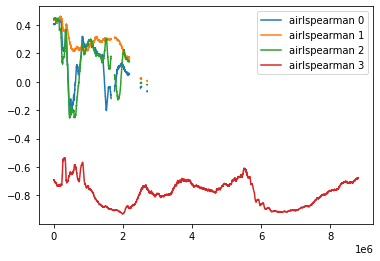

In [3]:
data = load_json_lines('./simple_tag_aairl.json')
print(data[10].keys())

keys = ['spearman 0', 'spearman 1', 'spearman 2', 'spearman 3']
target_x = [[] for _ in range(len(keys))]
target_y = [[] for _ in range(len(keys))]
for i, key in enumerate(keys):
    for d in data:
        if key in d:
            target_x[i].append(d['total_timesteps'])
            target_y[i].append(d[key])


for i in range(len(target_x)):
    plt.title('simple_speaker_listener (spearman)')
    plt.ylim(-1, 1)
    y = mean_pre_nex(target_y[i], pre=100, nex=100)
    plt.plot(target_x[i], y, label='aairl'+keys[i])
    
plt.legend()
plt.show()
data = load_json_lines('./simple_tag_airl.json')
print(data[10].keys())

keys = ['spearman 0', 'spearman 1', 'spearman 2', 'spearman 3']
target_x = [[] for _ in range(len(keys))]
target_y = [[] for _ in range(len(keys))]
for i, key in enumerate(keys):
    for d in data:
        if key in d:
            target_x[i].append(d['total_timesteps'])
            target_y[i].append(d[key])


for i in range(len(target_x)):
    y = mean_pre_nex(target_y[i], pre=100, nex=100)
    plt.plot(target_x[i], y, label='airl'+keys[i])
    
plt.legend()
plt.show()


data = load_json_lines('./dist-tag-aairl.json')
print(data[10].keys())

keys = ['spearman 0', 'spearman 1', 'spearman 2', 'spearman 3']
target_x = [[] for _ in range(len(keys))]
target_y = [[] for _ in range(len(keys))]
for i, key in enumerate(keys):
    for d in data:
        if key in d:
            target_x[i].append(d['total_timesteps'])
            target_y[i].append(d[key])


for i in range(len(target_x)):
    y = mean_pre_nex(target_y[i], pre=100, nex=100)
    plt.plot(target_x[i], y, label='airl'+keys[i])
    
plt.legend()
plt.show()

data = load_json_lines('./dist-tag-airl.json')
print(data[10].keys())

keys = ['spearman 0', 'spearman 1', 'spearman 2', 'spearman 3']
target_x = [[] for _ in range(len(keys))]
target_y = [[] for _ in range(len(keys))]
for i, key in enumerate(keys):
    for d in data:
        if key in d:
            target_x[i].append(d['total_timesteps'])
            target_y[i].append(d[key])


for i in range(len(target_x)):
    y = mean_pre_nex(target_y[i], pre=100, nex=100)
    plt.plot(target_x[i], y, label='airl'+keys[i])
    
plt.legend()
plt.show()

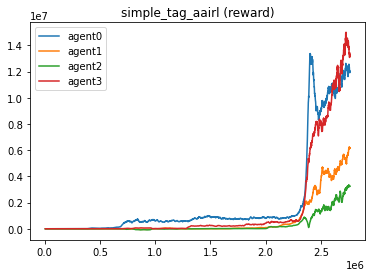

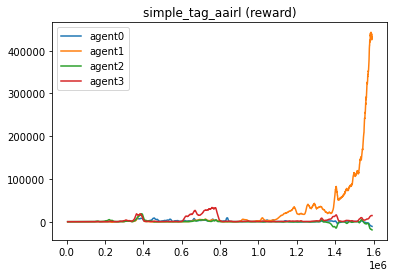

dict_keys(['nupdates', 'total_timesteps', 'fps', 'explained_variance 0', 'policy_entropy 0', 'policy_loss 0', 'value_loss 0', 'archive_num 0', 'pearson 0', 'spearman 0', 'reward 0', 'explained_variance 1', 'policy_entropy 1', 'policy_loss 1', 'value_loss 1', 'archive_num 1', 'pearson 1', 'spearman 1', 'reward 1', 'explained_variance 2', 'policy_entropy 2', 'policy_loss 2', 'value_loss 2', 'archive_num 2', 'pearson 2', 'spearman 2', 'reward 2', 'explained_variance 3', 'policy_entropy 3', 'policy_loss 3', 'value_loss 3', 'archive_num 3', 'pearson 3', 'spearman 3', 'reward 3', 'total_loss 0', 'total_loss 1', 'total_loss 2', 'total_loss 3'])


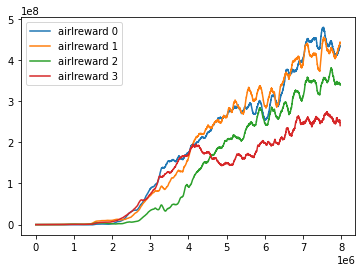

dict_keys(['nupdates', 'total_timesteps', 'fps', 'explained_variance 0', 'policy_entropy 0', 'policy_loss 0', 'value_loss 0', 'pearson 0', 'spearman 0', 'reward 0', 'explained_variance 1', 'policy_entropy 1', 'policy_loss 1', 'value_loss 1', 'pearson 1', 'spearman 1', 'reward 1', 'explained_variance 2', 'policy_entropy 2', 'policy_loss 2', 'value_loss 2', 'pearson 2', 'spearman 2', 'reward 2', 'explained_variance 3', 'policy_entropy 3', 'policy_loss 3', 'value_loss 3', 'pearson 3', 'spearman 3', 'reward 3', 'total_loss 0', 'total_loss 1', 'total_loss 2', 'total_loss 3'])


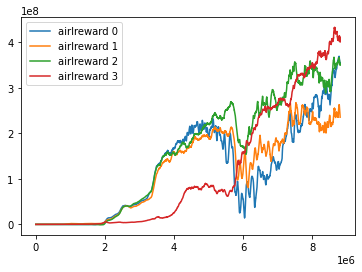

In [4]:
data = load_json_lines('./simple_tag_aairl.json')
keys = ['reward '+str(i) for i in [0, 1, 2, 3]]
target_x = [[] for _ in range(len(keys))]
target_y = [[] for _ in range(len(keys))]
for i, key in enumerate(keys):
    for d in data:
        if key in d:
            target_x[i].append(d['total_timesteps'])
            target_y[i].append(d[key])


for i in range(len(target_x)):
    plt.title('simple_tag_aairl (reward)')
    #plt.ylim(-1, 1)
    y = mean_pre_nex(target_y[i], pre=10, nex=10)
    plt.plot(target_x[i], y, label='agent'+str(i))
plt.legend()
plt.show()

data = load_json_lines('./simple_tag_airl.json')
keys = ['reward '+str(i) for i in [0, 1, 2, 3]]
target_x = [[] for _ in range(len(keys))]
target_y = [[] for _ in range(len(keys))]
for i, key in enumerate(keys):
    for d in data:
        if key in d:
            target_x[i].append(d['total_timesteps'])
            target_y[i].append(d[key])


for i in range(len(target_x)):
    plt.title('simple_tag_aairl (reward)')
    #plt.ylim(-1, 1)
    y = mean_pre_nex(target_y[i], pre=10, nex=10)
    plt.plot(target_x[i], y, label='agent'+str(i))
plt.legend()
plt.show()

data = load_json_lines('./dist-tag-aairl.json')
print(data[10].keys())

keys = ['reward '+str(i) for i in [0, 1, 2, 3]]
target_x = [[] for _ in range(len(keys))]
target_y = [[] for _ in range(len(keys))]
for i, key in enumerate(keys):
    for d in data:
        if key in d:
            target_x[i].append(d['total_timesteps'])
            target_y[i].append(d[key])


for i in range(len(target_x)):
    y = mean_pre_nex(target_y[i], pre=100, nex=100)
    plt.plot(target_x[i], y, label='airl'+keys[i])
    
plt.legend()
plt.show()

data = load_json_lines('./dist-tag-airl.json')
print(data[10].keys())

keys = ['reward '+str(i) for i in [0, 1, 2, 3]]
target_x = [[] for _ in range(len(keys))]
target_y = [[] for _ in range(len(keys))]
for i, key in enumerate(keys):
    for d in data:
        if key in d:
            target_x[i].append(d['total_timesteps'])
            target_y[i].append(d[key])


for i in range(len(target_x)):
    y = mean_pre_nex(target_y[i], pre=100, nex=100)
    plt.plot(target_x[i], y, label='airl'+keys[i])
    
plt.legend()
plt.show()

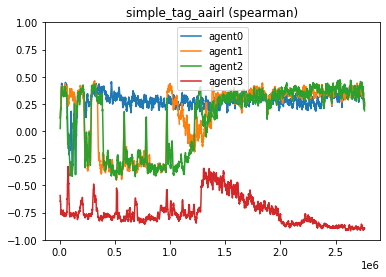

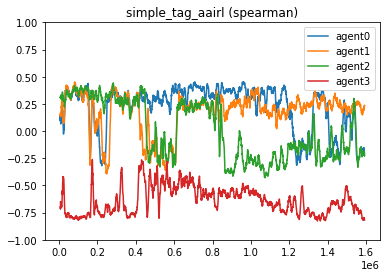

dict_keys(['nupdates', 'total_timesteps', 'fps', 'explained_variance 0', 'policy_entropy 0', 'policy_loss 0', 'value_loss 0', 'archive_num 0', 'pearson 0', 'spearman 0', 'reward 0', 'explained_variance 1', 'policy_entropy 1', 'policy_loss 1', 'value_loss 1', 'archive_num 1', 'pearson 1', 'spearman 1', 'reward 1', 'explained_variance 2', 'policy_entropy 2', 'policy_loss 2', 'value_loss 2', 'archive_num 2', 'pearson 2', 'spearman 2', 'reward 2', 'explained_variance 3', 'policy_entropy 3', 'policy_loss 3', 'value_loss 3', 'archive_num 3', 'pearson 3', 'spearman 3', 'reward 3', 'total_loss 0', 'total_loss 1', 'total_loss 2', 'total_loss 3'])


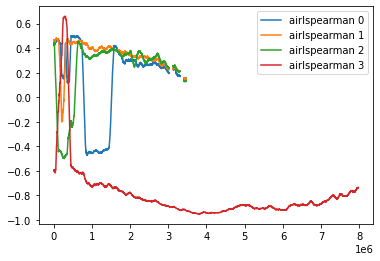

dict_keys(['nupdates', 'total_timesteps', 'fps', 'explained_variance 0', 'policy_entropy 0', 'policy_loss 0', 'value_loss 0', 'pearson 0', 'spearman 0', 'reward 0', 'explained_variance 1', 'policy_entropy 1', 'policy_loss 1', 'value_loss 1', 'pearson 1', 'spearman 1', 'reward 1', 'explained_variance 2', 'policy_entropy 2', 'policy_loss 2', 'value_loss 2', 'pearson 2', 'spearman 2', 'reward 2', 'explained_variance 3', 'policy_entropy 3', 'policy_loss 3', 'value_loss 3', 'pearson 3', 'spearman 3', 'reward 3', 'total_loss 0', 'total_loss 1', 'total_loss 2', 'total_loss 3'])


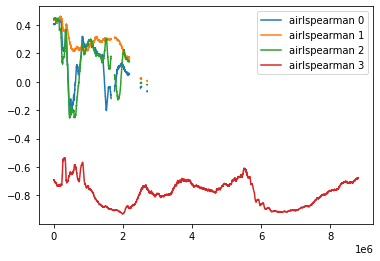

In [9]:
data = load_json_lines('./simple_tag_aairl.json')
keys = ['spearman '+str(i) for i in [0, 1, 2, 3]]
target_x = [[] for _ in range(len(keys))]
target_y = [[] for _ in range(len(keys))]
for i, key in enumerate(keys):
    for d in data:
        if key in d:
            target_x[i].append(d['total_timesteps'])
            target_y[i].append(d[key])


for i in range(len(target_x)):
    plt.title('simple_tag_aairl (spearman)')
    plt.ylim(-1, 1)
    y = mean_pre_nex(target_y[i], pre=10, nex=10)
    plt.plot(target_x[i], y, label='agent'+str(i))
plt.legend()
plt.show()

data = load_json_lines('./simple_tag_airl.json')
keys = ['spearman '+str(i) for i in [0, 1, 2, 3]]
target_x = [[] for _ in range(len(keys))]
target_y = [[] for _ in range(len(keys))]
for i, key in enumerate(keys):
    for d in data:
        if key in d:
            target_x[i].append(d['total_timesteps'])
            target_y[i].append(d[key])


for i in range(len(target_x)):
    plt.title('simple_tag_aairl (spearman)')
    plt.ylim(-1, 1)
    y = mean_pre_nex(target_y[i], pre=10, nex=10)
    plt.plot(target_x[i], y, label='agent'+str(i))
plt.legend()
plt.show()


data = load_json_lines('./dist-tag-aairl.json')
print(data[10].keys())

keys = ['spearman '+str(i) for i in [0, 1, 2, 3]]
target_x = [[] for _ in range(len(keys))]
target_y = [[] for _ in range(len(keys))]
for i, key in enumerate(keys):
    for d in data:
        if key in d:
            target_x[i].append(d['total_timesteps'])
            target_y[i].append(d[key])


for i in range(len(target_x)):
    y = mean_pre_nex(target_y[i], pre=100, nex=100)
    plt.plot(target_x[i], y, label='airl'+keys[i])
    
plt.legend()
plt.show()

data = load_json_lines('./dist-tag-airl.json')
print(data[10].keys())

keys = ['spearman '+str(i) for i in [0, 1, 2, 3]]
target_x = [[] for _ in range(len(keys))]
target_y = [[] for _ in range(len(keys))]
for i, key in enumerate(keys):
    for d in data:
        if key in d:
            target_x[i].append(d['total_timesteps'])
            target_y[i].append(d[key])


for i in range(len(target_x)):
    y = mean_pre_nex(target_y[i], pre=100, nex=100)
    plt.plot(target_x[i], y, label='airl'+keys[i])
    
plt.legend()
plt.show()

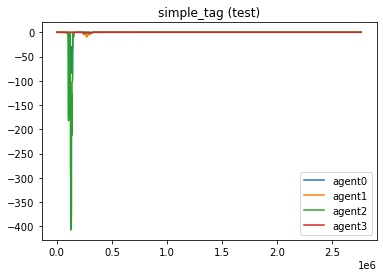

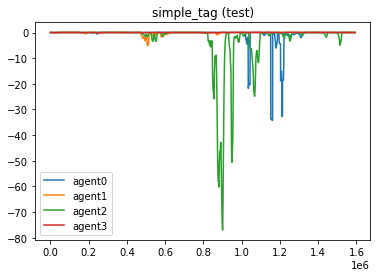

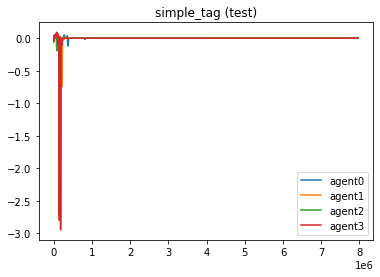

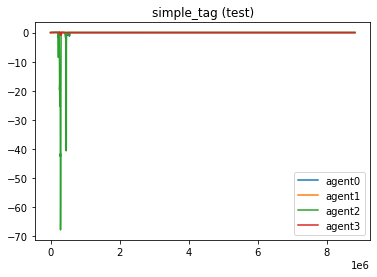

In [6]:


data = load_json_lines('./simple_tag_aairl.json')
keys = ['explained_variance '+str(i) for i in [0, 1, 2, 3]]
target_x = [[] for _ in range(len(keys))]
target_y = [[] for _ in range(len(keys))]
for i, key in enumerate(keys):
    for d in data:
        if key in d:
            target_x[i].append(d['total_timesteps'])
            target_y[i].append(d[key])


for i in range(len(target_x)):
    plt.title('simple_tag (test)')
    #plt.ylim(-1, 1)
    y = mean_pre_nex(target_y[i], pre=10, nex=10)
    plt.plot(target_x[i], y, label='agent'+str(i))
plt.legend()
plt.show()

    
data = load_json_lines('./simple_tag_airl.json')
keys = ['explained_variance '+str(i) for i in [0, 1, 2, 3]]
target_x = [[] for _ in range(len(keys))]
target_y = [[] for _ in range(len(keys))]
for i, key in enumerate(keys):
    for d in data:
        if key in d:
            target_x[i].append(d['total_timesteps'])
            target_y[i].append(d[key])


for i in range(len(target_x)):
    plt.title('simple_tag (test)')
    #plt.ylim(-1, 1)
    y = mean_pre_nex(target_y[i], pre=10, nex=10)
    plt.plot(target_x[i], y, label='agent'+str(i))
plt.legend()
plt.show()


data = load_json_lines('./dist-tag-aairl.json')
keys = ['explained_variance '+str(i) for i in [0, 1, 2, 3]]
target_x = [[] for _ in range(len(keys))]
target_y = [[] for _ in range(len(keys))]
for i, key in enumerate(keys):
    for d in data:
        if key in d:
            target_x[i].append(d['total_timesteps'])
            target_y[i].append(d[key])


for i in range(len(target_x)):
    plt.title('simple_tag (test)')
    #plt.ylim(-1, 1)
    y = mean_pre_nex(target_y[i], pre=10, nex=10)
    plt.plot(target_x[i], y, label='agent'+str(i))
plt.legend()
plt.show()


data = load_json_lines('./dist-tag-airl.json')
keys = ['explained_variance '+str(i) for i in [0, 1, 2, 3]]
target_x = [[] for _ in range(len(keys))]
target_y = [[] for _ in range(len(keys))]
for i, key in enumerate(keys):
    for d in data:
        if key in d:
            target_x[i].append(d['total_timesteps'])
            target_y[i].append(d[key])


for i in range(len(target_x)):
    plt.title('simple_tag (test)')
    #plt.ylim(-1, 1)
    y = mean_pre_nex(target_y[i], pre=10, nex=10)
    plt.plot(target_x[i], y, label='agent'+str(i))
plt.legend()
plt.show()

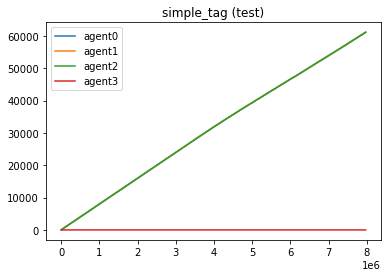

In [7]:
data = load_json_lines('./dist-tag-aairl.json')
keys = ['archive_num '+str(i) for i in [0, 1, 2, 3]]
target_x = [[] for _ in range(len(keys))]
target_y = [[] for _ in range(len(keys))]
for i, key in enumerate(keys):
    for d in data:
        if key in d:
            target_x[i].append(d['total_timesteps'])
            target_y[i].append(d[key])


for i in range(len(target_x)):
    plt.title('simple_tag (test)')
    #plt.ylim(-1, 1)
    y = target_y[i]
    #y = mean_pre_nex(target_y[i], pre=10, nex=10)
    plt.plot(target_x[i], y, label='agent'+str(i))
plt.legend()
plt.show()

In [46]:
import pickle as pkl

datas = []
with open("airl_01000-1000tra.pkl", mode="rb") as f:
    data = pickle.load(f)
    datas.append(data)
    
with open("aairl_01000-1000tra.pkl", mode="rb") as f:
    data = pickle.load(f)
    datas.append(data)

with open("checkpoint01500-10tra.pkl", mode="rb") as f:
    data = pickle.load(f)
    datas.append(data)


In [47]:
for n, data in enumerate(datas):
    print(f"data{n}")
    ep_ret = []
    for d in data:
        ep_ret.append((d['ep_ret']))
    ep_ret = np.array(ep_ret).T
    for i in range(len(ep_ret)):
        sum_ep = np.sum(ep_ret[i])/len(ep_ret[i])
        print(f"agent{i}: {sum_ep}")
        #print(ep_ret[i])

data0
agent0: 29.81
agent1: 29.81
agent2: 29.81
agent3: -79.09947513597561
data1
agent0: 39.98
agent1: 39.98
agent2: 39.98
agent3: -56.848427845078824
data2
agent0: 25.0
agent1: 25.0
agent2: 25.0
agent3: -68.75804364257975


In [44]:
data[0].keys()

dict_keys(['ob', 'ac', 'rew', 'ep_ret', 'all_ob'])